In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

In [2]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [3]:
train_df.tail(10)

PassengerId  Survived  Pclass                                      Name  \
881          882         0       3                        Markun, Mr. Johann   
882          883         0       3              Dahlberg, Miss. Gerda Ulrika   
883          884         0       2             Banfield, Mr. Frederick James   
884          885         0       3                    Sutehall, Mr. Henry Jr   
885          886         0       3      Rice, Mrs. William (Margaret Norton)   
886          887         0       2                     Montvila, Rev. Juozas   
887          888         1       1              Graham, Miss. Margaret Edith   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   
889          890         1       1                     Behr, Mr. Karl Howell   
890          891         0       3                       Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked  
881    male  33.0      0      0            349257   7.8958   NaN        S  
882  female  22.0      0      0              7552  10.5167   NaN        S  
883    male  28.0      0      0  C.A./SOTON 34068  10.5000   NaN        S  
884    male  25.0      0      0   SOTON/OQ 392076   7.0500   NaN        S  
885  female  39.0      0      5            382652  29.1250   NaN        Q  
886    male  27.0      0      0            211536  13.0000   NaN        S  
887  female  19.0      0      0            112053  30.0000   B42        S  
888  female   NaN      1      2        W./C. 6607  23.4500   NaN        S  
889    male  26.0      0      0            111369  30.0000  C148        C  
890    male  32.0      0      0            370376   7.7500   NaN        Q

In [4]:
test_df.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

In [5]:
train_df.loc[(train_df.Sex == 'male'),'Sex']='1'
train_df.loc[(train_df.Sex == 'female'),'Sex']='0'
# Change sex into binary variable, 1 = male, 0 = female

test_df.loc[(test_df.Sex == 'male'),'Sex']='1'
test_df.loc[(test_df.Sex == 'female'),'Sex']='0'

In [6]:
# Check the number of  missing values
train_df.isnull().sum()
# There are NaN values in Age, Cabin and Embarked

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
# Replacing the null values in Age column with Mean
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
train_df['Age'] = imputer.fit_transform(train_df[['Age']])
train_df['Age'].isnull().sum()
test_df['Age'] = imputer.fit_transform(test_df[['Age']])

In [8]:
# Replace Cabin and Embarked which are Categorical values
imputer_embarked = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
# Embarked
train_df['Embarked'].value_counts()
# Replace NaN values with the most frequent value which is S.
train_df['Embarked'] = imputer_embarked.fit_transform(train_df[['Embarked']])
test_df['Embarked'] = imputer_embarked.fit_transform(test_df[['Embarked']])

In [9]:
# For Cabin, we would add an 'Unknown' class and replace NaN values with the 'Unknown' class
imputer_cabin = SimpleImputer(missing_values = np.nan, strategy = 'constant', fill_value = 'Unknown')
train_df['Cabin'] = imputer_cabin.fit_transform(train_df[['Cabin']])
test_df['Cabin'] = imputer_cabin.fit_transform(test_df[['Cabin']])

In [10]:
train_df.loc[(train_df.Embarked == 'S'),'Embarked']= '0'
train_df.loc[(train_df.Embarked == 'C'),'Embarked']= '1'
train_df.loc[(train_df.Embarked == 'Q'),'Embarked']= '2'
# Change Embarked, S = 0, C = 1, Q = 2

test_df.loc[(test_df.Embarked == 'S'),'Embarked']= '0'
test_df.loc[(test_df.Embarked == 'C'),'Embarked']= '1'
test_df.loc[(test_df.Embarked == 'Q'),'Embarked']= '2'

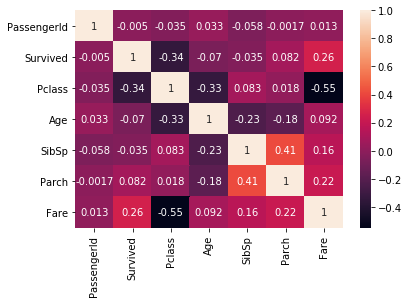

In [11]:
corrMatrix = train_df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [12]:
low = len(train_df[train_df['Pclass'] == 3])
mid = len(train_df[train_df['Pclass'] == 2])
high = len(train_df[train_df['Pclass'] == 1])
dist_class = [low,mid,high]

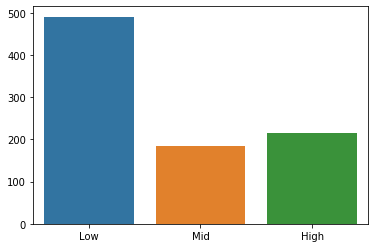

In [13]:
sn.barplot(['Low', 'Mid', 'High'], dist_class)
# Majority of passengers are 3rd class passengers. 
# Followed by 1st class passengers than 2nd class passengers being the smallest group of passengers.

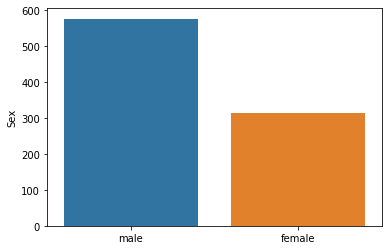

In [14]:
sn.barplot(['male', 'female'], train_df['Sex'].value_counts())
# More males than females

Text(0, 0.5, 'count')

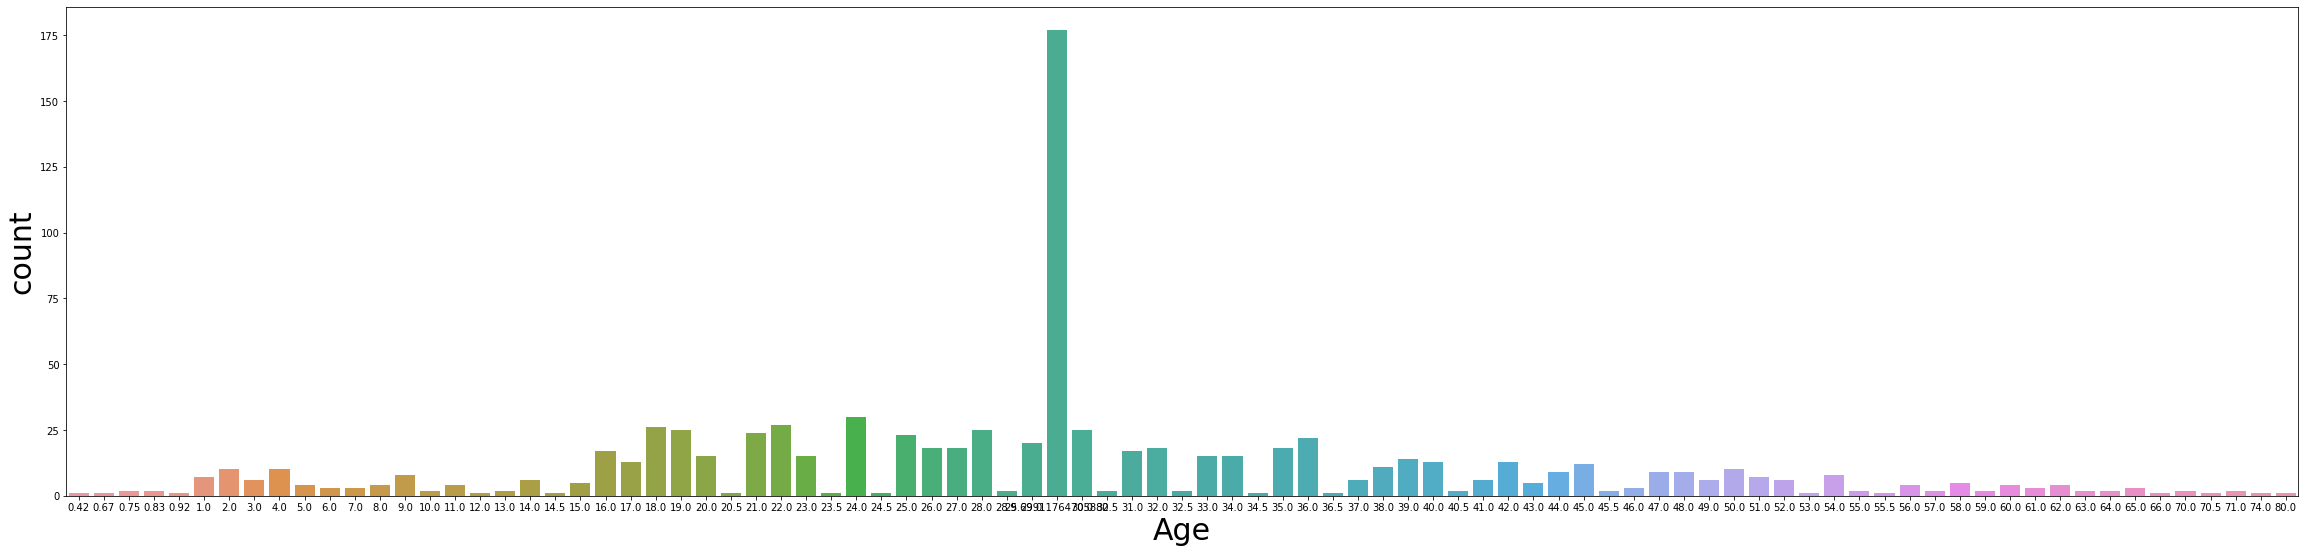

In [15]:
fig, ax = plt.subplots(figsize=(40,9))
#plt.xlabel('age', fontsize=18)
#plt.ylabel('count', fontsize=16)

graph = sn.barplot(train_df['Age'].value_counts().index, train_df['Age'].value_counts(), ax = ax)
#graph.set(xlabel="Age", ylabel = "Count")
graph.set_xlabel('Age', fontsize = 30)
graph.set_ylabel('count', fontsize = 30)
# matplotlib variation
# plt.bar(train_df['Age'].value_counts().index, train_df['Age'].value_counts())

# Majority of the passengers are aged around 17 - 36 years old.

In [16]:
# Feature selection before doing classification
# Using Principal Component Analysis for feature selection
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# Separating out the features
features = train_df.drop(['PassengerId','Survived', 'Name', 'Ticket', 'Cabin'], 1)
# Separating out the target
target = train_df['Survived']

# Split dataset into Training and Testing set
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 0)

In [17]:
# The number of components is not specified so all 8 of the features would be returned
pca = PCA()
x_train = pca.fit_transform(x_train)
x_test = pca.fit_transform(x_test)
x_test

array([[-1.91060764e+01,  5.28598999e-01, -4.28389137e-01, ...,
         8.11193293e-01,  7.11913364e-02, -3.04878766e-01],
       [-2.60145077e+01,  6.67772985e-01, -3.34708635e-01, ...,
         2.87278880e-01, -6.01744983e-01, -1.45361368e-01],
       [-4.86967327e+00, -2.25540684e+01,  2.68128789e+00, ...,
         3.70074899e-01,  8.63168691e-01, -5.25494435e-01],
       ...,
       [ 7.97377459e+01, -1.21517043e-01, -2.49640679e-01, ...,
        -2.05076937e-01,  4.17789985e-01,  4.82070393e-01],
       [-2.58431983e+01, -6.03237173e+00, -5.37517717e-01, ...,
         1.97796503e-01, -5.86702475e-01, -1.51663119e-01],
       [-2.57267504e+01, -1.00332661e+01, -6.58672175e-01, ...,
         1.44487386e-01, -5.77839129e-01, -1.55430301e-01]])

In [18]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([9.34204341e-01, 6.48970821e-02, 3.44466099e-04, 1.82881055e-04,
       1.59172376e-04, 1.32977190e-04, 7.90800173e-05])

In [19]:
# Use 2 principal components 
pca_2 = PCA(n_components = 2)
x_train = pca_2.fit_transform(x_train)
x_test = pca_2.fit_transform(x_test)
explained_variance_2 = pca_2.explained_variance_ratio_
explained_variance_2

array([0.93420434, 0.06489708])

In [21]:
#pca_3 = PCA(n_components = 3)
#x_train = pca_3.fit_transform(x_train)
#x_test = pca_3.fit_transform(x_test)
#explained_variance_3 = pca_3.explained_variance_ratio_
#explained_variance_3

In [22]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth = 3, random_state = 0)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

In [23]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy %f' %accuracy_score(y_test, y_pred))

[[98 12]
 [38 31]]
Accuracy 0.720670


In [24]:
features = train_df.drop(['PassengerId','Survived', 'Name', 'Ticket', 'Cabin'], 1)
# Separating out the target
target = train_df['Survived']

# Split dataset into Training and Testing set
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 0)

In [25]:
classifier = RandomForestClassifier(max_depth = 10, random_state = 0)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

In [26]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy %f' %accuracy_score(y_test, y_pred))

[[102   8]
 [ 20  49]]
Accuracy 0.843575


In [28]:
test_df['Survived'] = 0
test_df['Fare'] = test_df['Fare'].fillna(test_df['Fare'].mean())
test_feat = test_df.drop(['PassengerId','Survived', 'Name', 'Ticket', 'Cabin'], 1)
# Separating out the target
test_target = test_df['Survived']
test_feat

Pclass Sex       Age  SibSp  Parch      Fare Embarked
0         3   1  34.50000      0      0    7.8292        2
1         3   0  47.00000      1      0    7.0000        0
2         2   1  62.00000      0      0    9.6875        2
3         3   1  27.00000      0      0    8.6625        0
4         3   0  22.00000      1      1   12.2875        0
..      ...  ..       ...    ...    ...       ...      ...
413       3   1  30.27259      0      0    8.0500        0
414       1   0  39.00000      0      0  108.9000        1
415       3   1  38.50000      0      0    7.2500        0
416       3   1  30.27259      0      0    8.0500        0
417       3   1  30.27259      1      1   22.3583        1

[418 rows x 7 columns]

In [29]:
y_pred_2 = classifier.predict(test_feat)

In [30]:
y_pred_2

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [31]:
test_df['Survived'] = y_pred_2

In [32]:
submission = test_df[['PassengerId', 'Survived']]

In [33]:
submission.to_csv('submission.csv', index = False)

In [34]:
# Used RandomForestClassifier with max_depth 10 and random_state = 0
# Accuracy of classifier is 0.843575 